In [2]:
numericCols = ['CostOfGoodsAndServicesSold', 'CostOfGoodsSold', 'CostOfServices', 'EarningsPerShareBasic', 
               'EarningsPerShareDiluted', 'GainLossOnDispositionOfAssets', 'GeneralAndAdministrativeExpense', 
               'IncomeTaxesPaid', 'IncreaseDecreaseInAccountsPayable', 'IncreaseDecreaseInAccountsReceivable', 
               'IncreaseDecreaseInAccruedLiabilities', 'IncreaseDecreaseInInventories', 
               'LaborAndRelatedExpense', 'NetCashProvidedByUsedInFinancingActivities', 
               'NetCashProvidedByUsedInFinancingActivitiesContinuingOperations', 
               'NetCashProvidedByUsedInInvestingActivities', 'NetCashProvidedByUsedInInvestingActivitiesContinuingOperations', 
               'NetCashProvidedByUsedInOperatingActivities', 'NetCashProvidedByUsedInOperatingActivitiesContinuingOperations', 
               'NetIncomeLoss', 'OperatingExpenses', 'OperatingIncomeLoss', 'PaymentsForRepurchaseOfCommonStock', 
               'PaymentsOfDividends', 'PaymentsOfDividendsCommonStock', 'PaymentsOfFinancingCosts', 'PaymentsToAcquireBusinessesNetOfCashAcquired', 
               'PaymentsToAcquirePropertyPlantAndEquipment', 'RepaymentsOfLongTermDebt', 'ResearchAndDevelopmentExpense', 
               'Revenues', 'SellingAndMarketingExpense', 'ShareBasedCompensation']

In [3]:
feature_importance = [99.0, 36.0, 12.0, 196.0, 81.0, 4.0, 58.0, 22.0, 156.0, 134.0, 17.0, 138.0, 8.0, 254.0, 35.0, 129.0, 67.0, 191.0, 38.0, 191.0, 22.0, 177.0, 127.0, 23.0, 104.0, 5.0, 209.0, 149.0, 94.0, 17.0, 101.0, 0.0, 106.0]

In [16]:
sorted_feature = [x for _,x in sorted(zip(feature_importance, numericCols), reverse=True)]

In [38]:
sorted_feature

['NetCashProvidedByUsedInFinancingActivities',
 'PaymentsToAcquireBusinessesNetOfCashAcquired',
 'EarningsPerShareBasic',
 'NetIncomeLoss',
 'NetCashProvidedByUsedInOperatingActivities',
 'OperatingIncomeLoss',
 'IncreaseDecreaseInAccountsPayable',
 'PaymentsToAcquirePropertyPlantAndEquipment',
 'IncreaseDecreaseInInventories',
 'IncreaseDecreaseInAccountsReceivable',
 'NetCashProvidedByUsedInInvestingActivities',
 'PaymentsForRepurchaseOfCommonStock',
 'ShareBasedCompensation',
 'PaymentsOfDividendsCommonStock',
 'Revenues',
 'CostOfGoodsAndServicesSold',
 'RepaymentsOfLongTermDebt',
 'EarningsPerShareDiluted',
 'NetCashProvidedByUsedInInvestingActivitiesContinuingOperations',
 'GeneralAndAdministrativeExpense',
 'NetCashProvidedByUsedInOperatingActivitiesContinuingOperations',
 'CostOfGoodsSold',
 'NetCashProvidedByUsedInFinancingActivitiesContinuingOperations',
 'PaymentsOfDividends',
 'OperatingExpenses',
 'IncomeTaxesPaid',
 'ResearchAndDevelopmentExpense',
 'IncreaseDecreaseInAcc

In [17]:
sorted(feature_importance,reverse=True)

[254.0,
 209.0,
 196.0,
 191.0,
 191.0,
 177.0,
 156.0,
 149.0,
 138.0,
 134.0,
 129.0,
 127.0,
 106.0,
 104.0,
 101.0,
 99.0,
 94.0,
 81.0,
 67.0,
 58.0,
 38.0,
 36.0,
 35.0,
 23.0,
 22.0,
 22.0,
 17.0,
 17.0,
 12.0,
 8.0,
 5.0,
 4.0,
 0.0]

In [20]:
selected_features = sorted_feature[:15]

In [39]:
selected_features

['NetCashProvidedByUsedInFinancingActivities',
 'PaymentsToAcquireBusinessesNetOfCashAcquired',
 'EarningsPerShareBasic',
 'NetIncomeLoss',
 'NetCashProvidedByUsedInOperatingActivities',
 'OperatingIncomeLoss',
 'IncreaseDecreaseInAccountsPayable',
 'PaymentsToAcquirePropertyPlantAndEquipment',
 'IncreaseDecreaseInInventories',
 'IncreaseDecreaseInAccountsReceivable',
 'NetCashProvidedByUsedInInvestingActivities',
 'PaymentsForRepurchaseOfCommonStock',
 'ShareBasedCompensation',
 'PaymentsOfDividendsCommonStock',
 'Revenues']

In [21]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('abc').config("spark.jars.packages", "com.microsoft.ml.spark:mmlspark_2.11:1.0.0-rc1").config("spark.jars.repositories", "https://mmlspark.azureedge.net/maven").getOrCreate()
spark

df = spark.read.parquet("s3://502-project-1/data")

df.printSchema()
df = df.na.drop(subset=['OperatingIncomeLoss', 'profit'])
print(df.count())
df = df.na.fill(0)
df = df.withColumn('profit_increase', df.profit - df.OperatingIncomeLoss)


df.createOrReplaceTempView("dfTable")
df = spark.sql("select *, CASE \
                   when profit_increase > 0 then 1 \
                   when profit_increase <= 0 then 0 \
                   end as label from dfTable")

cols = ['cik', 'company_name', 'assigned_sic', 'accession_number_int', 'filing_date', 
        'CostOfGoodsAndServicesSold', 'CostOfGoodsSold', 'CostOfServices', 'EarningsPerShareBasic', 
        'EarningsPerShareDiluted', 'GainLossOnDispositionOfAssets', 'GeneralAndAdministrativeExpense', 
        'IncomeTaxesPaid', 'IncreaseDecreaseInAccountsPayable', 'IncreaseDecreaseInAccountsReceivable', 
        'IncreaseDecreaseInAccruedLiabilities', 'IncreaseDecreaseInInventories', 'LaborAndRelatedExpense', 
        'NetCashProvidedByUsedInFinancingActivities', 
        'NetCashProvidedByUsedInFinancingActivitiesContinuingOperations', 
        'NetCashProvidedByUsedInInvestingActivities', 
        'NetCashProvidedByUsedInInvestingActivitiesContinuingOperations', 
        'NetCashProvidedByUsedInOperatingActivities', 
        'NetCashProvidedByUsedInOperatingActivitiesContinuingOperations', 'NetIncomeLoss', 'OperatingExpenses', 
        'OperatingIncomeLoss', 'PaymentsForRepurchaseOfCommonStock', 'PaymentsOfDividends', 
        'PaymentsOfDividendsCommonStock', 'PaymentsOfFinancingCosts', 
        'PaymentsToAcquireBusinessesNetOfCashAcquired', 'PaymentsToAcquirePropertyPlantAndEquipment', 
        'RepaymentsOfLongTermDebt', 'ResearchAndDevelopmentExpense', 'Revenues', 'SellingAndMarketingExpense', 
        'ShareBasedCompensation', 'year', 'profit_year', 'profit', 'profit_increase', 'label']

from pyspark.ml.feature import VectorAssembler

numericCols = ['CostOfGoodsAndServicesSold', 'CostOfGoodsSold', 'CostOfServices', 'EarningsPerShareBasic', 
               'EarningsPerShareDiluted', 'GainLossOnDispositionOfAssets', 'GeneralAndAdministrativeExpense', 
               'IncomeTaxesPaid', 'IncreaseDecreaseInAccountsPayable', 'IncreaseDecreaseInAccountsReceivable', 
               'IncreaseDecreaseInAccruedLiabilities', 'IncreaseDecreaseInInventories', 
               'LaborAndRelatedExpense', 'NetCashProvidedByUsedInFinancingActivities', 
               'NetCashProvidedByUsedInFinancingActivitiesContinuingOperations', 
               'NetCashProvidedByUsedInInvestingActivities', 'NetCashProvidedByUsedInInvestingActivitiesContinuingOperations', 
               'NetCashProvidedByUsedInOperatingActivities', 'NetCashProvidedByUsedInOperatingActivitiesContinuingOperations', 
               'NetIncomeLoss', 'OperatingExpenses', 'OperatingIncomeLoss', 'PaymentsForRepurchaseOfCommonStock', 
               'PaymentsOfDividends', 'PaymentsOfDividendsCommonStock', 'PaymentsOfFinancingCosts', 'PaymentsToAcquireBusinessesNetOfCashAcquired', 
               'PaymentsToAcquirePropertyPlantAndEquipment', 'RepaymentsOfLongTermDebt', 'ResearchAndDevelopmentExpense', 
               'Revenues', 'SellingAndMarketingExpense', 'ShareBasedCompensation']

assembler = VectorAssembler(inputCols=selected_features, outputCol="features", handleInvalid="keep")

from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[assembler])

pipelineModel = pipeline.fit(df)

df = pipelineModel.transform(df)
selectedCols = ['features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- cik: integer (nullable = true)
 |-- company_name: string (nullable = true)
 |-- assigned_sic: integer (nullable = true)
 |-- accession_number_int: long (nullable = true)
 |-- filing_date: date (nullable = true)
 |-- CostOfGoodsAndServicesSold: double (nullable = true)
 |-- CostOfGoodsSold: double (nullable = true)
 |-- CostOfServices: double (nullable = true)
 |-- EarningsPerShareBasic: double (nullable = true)
 |-- EarningsPerShareDiluted: double (nullable = true)
 |-- GainLossOnDispositionOfAssets: double (nullable = true)
 |-- GeneralAndAdministrativeExpense: double (nullable = true)
 |-- IncomeTaxesPaid: double (nullable = true)
 |-- IncreaseDecreaseInAccountsPayable: double (nullable = true)
 |-- IncreaseDecreaseInAccountsReceivable: double (nullable = true)
 |-- IncreaseDecreaseInAccruedLiabilities: double (nullable = true)
 |-- IncreaseDecreaseInInventories: double (nullable = true)
 |-- LaborAndRelatedExpense: double (nullable = true)
 |-- NetCashProvidedByUsedInFinan

In [22]:
import mmlspark

from mmlspark.lightgbm import LightGBMRegressor

train, test = df.randomSplit([0.85, 0.15], seed=1)

lgb = LightGBMRegressor(alpha=0.3, learningRate=0.3, numIterations=100, numLeaves=31, featuresCol='features',labelCol='profit_increase')

lgbModel = lgb.fit(train)

test_model = lgbModel.transform(test)

In [23]:
print(lgbModel.getFeatureImportances())

from mmlspark.train import ComputeModelStatistics
metrics = ComputeModelStatistics(evaluationMetric='regression',
                                 labelCol='profit_increase',
                                 scoresCol='prediction') \
            .transform(test_model)
metrics.toPandas()

[214.0, 279.0, 211.0, 202.0, 241.0, 232.0, 185.0, 186.0, 194.0, 226.0, 205.0, 155.0, 132.0, 158.0, 180.0]


,mean_squared_error,root_mean_squared_error,R^2,mean_absolute_error
0,6.789179e+18,2.605605e+09,-0.331054,2.541467e+08


In [24]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator as bce
evaluator = bce(rawPredictionCol='prediction', labelCol='profit_increase')
print(evaluator.evaluate(test_model, {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test_model, {evaluator.metricName: 'areaUnderPR'}))

0.5261316624952987
0.6199691935406851


In [25]:
from mmlspark.lightgbm import LightGBMClassifier
lgbClassifier = LightGBMClassifier(learningRate=0.3,
                           numIterations=100,
                           numLeaves=31,
                           featuresCol = 'features',
                            labelCol = 'label')

In [26]:
lgbClassifierModel = lgbClassifier.fit(train)
test_class = lgbClassifierModel.transform(test)

In [27]:
evaluator = bce(rawPredictionCol='probability', labelCol='profit')
print(evaluator.evaluate(test_class, {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test_class, {evaluator.metricName: 'areaUnderPR'}))

0.5475064755209242
0.5777545846692128


In [28]:
y_true = test_class.select(['label']).collect()
y_pred = test_class.select(['prediction']).collect()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred, labels=[0, 1])

              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1089
           1       0.62      0.64      0.63      1443

    accuracy                           0.57      2532
   macro avg       0.56      0.56      0.56      2532
weighted avg       0.57      0.57      0.57      2532



array([[524, 565],
       [521, 922]])

In [31]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

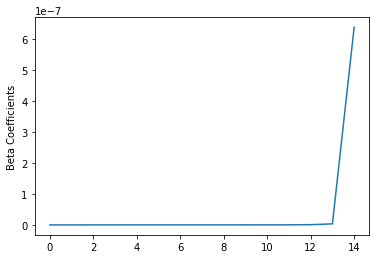

In [32]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

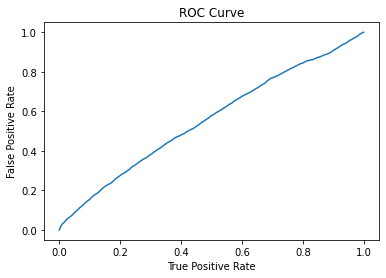

Training set areaUnderROC: 0.5572236423578443


In [33]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

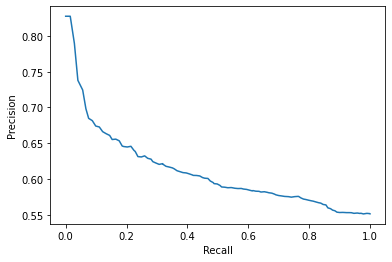

In [34]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [35]:
predictions = lrModel.transform(test)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.5433532706259979


In [36]:
y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred, labels=[0, 1])

              precision    recall  f1-score   support

           0       0.39      0.01      0.02      1089
           1       0.57      0.99      0.72      1443

    accuracy                           0.57      2532
   macro avg       0.48      0.50      0.37      2532
weighted avg       0.49      0.57      0.42      2532



array([[  12, 1077],
       [  19, 1424]])